# Load in the data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pandas.io.formats.printing import pprint_thing

from sklearn.decomposition import PCA

from sklearn.model_selection import cross_validate, StratifiedKFold, LeaveOneOut

from sklearn.metrics import f1_score, make_scorer

from sklearn.pipeline import make_pipeline, make_union, Pipeline

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer

from sklearn.svm import SVC, LinearSVC



In [ ]:
from google.colab import drive
drive.mount('/gdrive')



Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%cd  /gdrive/MyDrive/364/'DecisionTreeRFComp'
%ls

/gdrive/MyDrive/364/DecisionTreeRFComp
'Copy of Exploration.ipynb'  'DTRF Comp.ipynb'   DTRFdata.csv


In [ ]:
df = pd.read_csv('DTRFdata.csv')
df

A1   A2   A3   A4   A5  A6     A7   A8     A9    A10  A11    A12    A13  \
0     UT   73  415   No   No   0  182.3  115  30.99  199.2   97  16.93  120.2   
1     MN   74  510   No  Yes  33  193.7   91  32.93  246.1   96  20.92  138.0   
2     NC  124  415   No   No   0  188.5   77  32.05  182.0  123  15.47  218.2   
3     MA  129  510  Yes   No   0  192.9  131  32.79  185.5  101  15.77  205.2   
4     TN   37  415   No   No   0  221.0  126  37.57  204.5  110  17.38  118.0   
...   ..  ...  ...  ...  ...  ..    ...  ...    ...    ...  ...    ...    ...   
2928  ND   84  408   No  Yes  38  193.0  106  32.81  153.6  106  13.06  260.4   
2929  IA   86  408   No   No   0  126.3  115  21.47  168.8  112  14.35  154.6   
2930  KS  148  510   No   No   0  239.3   84  40.68  195.7   85  16.63  232.6   
2931  NC  135  415   No   No   0  201.8   81  34.31  225.0  114  19.13  204.4   
2932  AL   86  415   No   No   0  128.3  121  21.81  197.1   93  16.75  138.4   

      A14    A15   A16  A17   A18  A19  target  
0     113   5.41  18.0    5  4.86    1       0  
1      92   6.21  14.6    3  3.94    2       0  
2     127   9.82   6.1    6  1.65    1       0  
3     130   9.23  10.9    4  2.94    1       0  
4      98   5.31   6.8    3  1.84    4       0  
...   ...    ...   ...  ...   ...  ...     ...  
2928   87  11.72   7.4    5  2.00    2       0  
2929   95   6.96   9.8    7  2.65    2       0  
2930  104  10.47  10.9    3  2.94    1       0  
2931   82   9.20  10.3    6  2.78    1       0  
2932  152   6.23  12.2    5  3.29    7       1  

[2933 rows x 20 columns]

# Simple Exploration

In [ ]:
df.isna().sum()

A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
A7        0
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14       0
A15       0
A16       0
A17       0
A18       0
A19       0
target    0
dtype: int64

In [ ]:
df.head()

A1   A2   A3   A4   A5  A6     A7   A8     A9    A10  A11    A12    A13  \
0  UT   73  415   No   No   0  182.3  115  30.99  199.2   97  16.93  120.2   
1  MN   74  510   No  Yes  33  193.7   91  32.93  246.1   96  20.92  138.0   
2  NC  124  415   No   No   0  188.5   77  32.05  182.0  123  15.47  218.2   
3  MA  129  510  Yes   No   0  192.9  131  32.79  185.5  101  15.77  205.2   
4  TN   37  415   No   No   0  221.0  126  37.57  204.5  110  17.38  118.0   

   A14   A15   A16  A17   A18  A19  target  
0  113  5.41  18.0    5  4.86    1       0  
1   92  6.21  14.6    3  3.94    2       0  
2  127  9.82   6.1    6  1.65    1       0  
3  130  9.23  10.9    4  2.94    1       0  
4   98  5.31   6.8    3  1.84    4       0

## observations 
- some columns are not just regular numbers
- A1 seems to be a state
- A4 and A5 are binary (should replace with 1,0) 
- A6 has a lot of empty values
- A2, A3, A17 and A19 seem to be integers 

In [ ]:
df.shape

(2933, 20)

In [ ]:
# let's take a look at the percentage of zeros: 
df.isin([0]).sum()/df.shape[0]*100


A1         0.000000
A2         0.000000
A3         0.000000
A4         0.000000
A5         0.000000
A6        71.837709
A7         0.068190
A8         0.068190
A9         0.068190
A10        0.034095
A11        0.034095
A12        0.034095
A13        0.000000
A14        0.000000
A15        0.000000
A16        0.579611
A17        0.579611
A18        0.579611
A19       20.934197
target    88.646437
dtype: float64

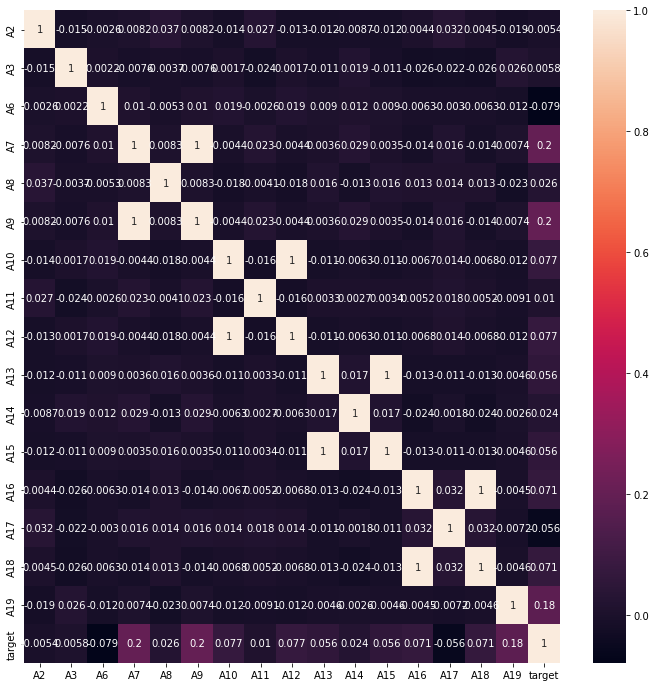

In [ ]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 12, 12


sns.heatmap(df.corr(), annot=True)


In [ ]:
df.isnull().any()

A1        False
A2        False
A3        False
A4        False
A5        False
A6        False
A7        False
A8        False
A9        False
A10       False
A11       False
A12       False
A13       False
A14       False
A15       False
A16       False
A17       False
A18       False
A19       False
target    False
dtype: bool

In [ ]:
df.describe()

A2           A3           A6           A7           A8  \
count  2933.000000  2933.000000  2933.000000  2933.000000  2933.000000   
mean    100.842482   437.128196     8.220252   178.943198   100.551313   
std      39.842362    42.358591    13.722843    53.347802    20.085590   
min       1.000000   408.000000     0.000000     0.000000     0.000000   
25%      74.000000   408.000000     0.000000   143.600000    88.000000   
50%     100.000000   415.000000     0.000000   179.700000   101.000000   
75%     127.000000   510.000000    20.000000   215.400000   114.000000   
max     243.000000   510.000000    51.000000   350.800000   165.000000   

                A9          A10          A11          A12          A13  \
count  2933.000000  2933.000000  2933.000000  2933.000000  2933.000000   
mean     30.420897   200.559666   100.030003    17.047808   201.458098   
std       9.069078    50.544814    20.077607     4.296302    50.802095   
min       0.000000     0.000000     0.000000     0.000000    23.200000   
25%      24.410000   166.400000    87.000000    14.140000   167.400000   
50%      30.550000   201.000000   100.000000    17.090000   201.700000   
75%      36.620000   234.900000   114.000000    19.970000   235.700000   
max      59.640000   363.700000   170.000000    30.910000   395.000000   

               A14          A15          A16          A17          A18  \
count  2933.000000  2933.000000  2933.000000  2933.000000  2933.000000   
mean    100.058643     9.065687    10.191238     4.465394     2.752165   
std      19.614532     2.286130     2.796596     2.404786     0.755073   
min      33.000000     1.040000     0.000000     0.000000     0.000000   
25%      87.000000     7.530000     8.400000     3.000000     2.270000   
50%     100.000000     9.080000    10.200000     4.000000     2.750000   
75%     113.000000    10.610000    12.000000     6.000000     3.240000   
max     175.000000    17.770000    20.000000    20.000000     5.400000   

               A19       target  
count  2933.000000  2933.000000  
mean      1.535288     0.113536  
std       1.277841     0.317301  
min       0.000000     0.000000  
25%       1.000000     0.000000  
50%       1.000000     0.000000  
75%       2.000000     0.000000  
max       9.000000     1.000000

In [ ]:
for col in df.columns:
  print(col, len(df[col].value_counts()))


A1 51
A2 210
A3 3
A4 2
A5 2
A6 46
A7 1551
A8 119
A9 1551
A10 1521
A11 122
A12 1363
A13 1505
A14 120
A15 906
A16 162
A17 21
A18 162
A19 10
target 2


In [ ]:
# states to regions 

states = {
        'AK': 'O',
        'AL': 'S',
        'AR': 'S',
        'AS': 'O',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'O',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'W',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'W',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W'
}

In [ ]:
df['region'] = df['A1'].map(states)
df['region'].head()

0    W
1    M
2    S
3    N
4    S
Name: region, dtype: object

In [ ]:
df['region'].value_counts()

S    819
W    771
N    661
M    590
O     92
Name: region, dtype: int64

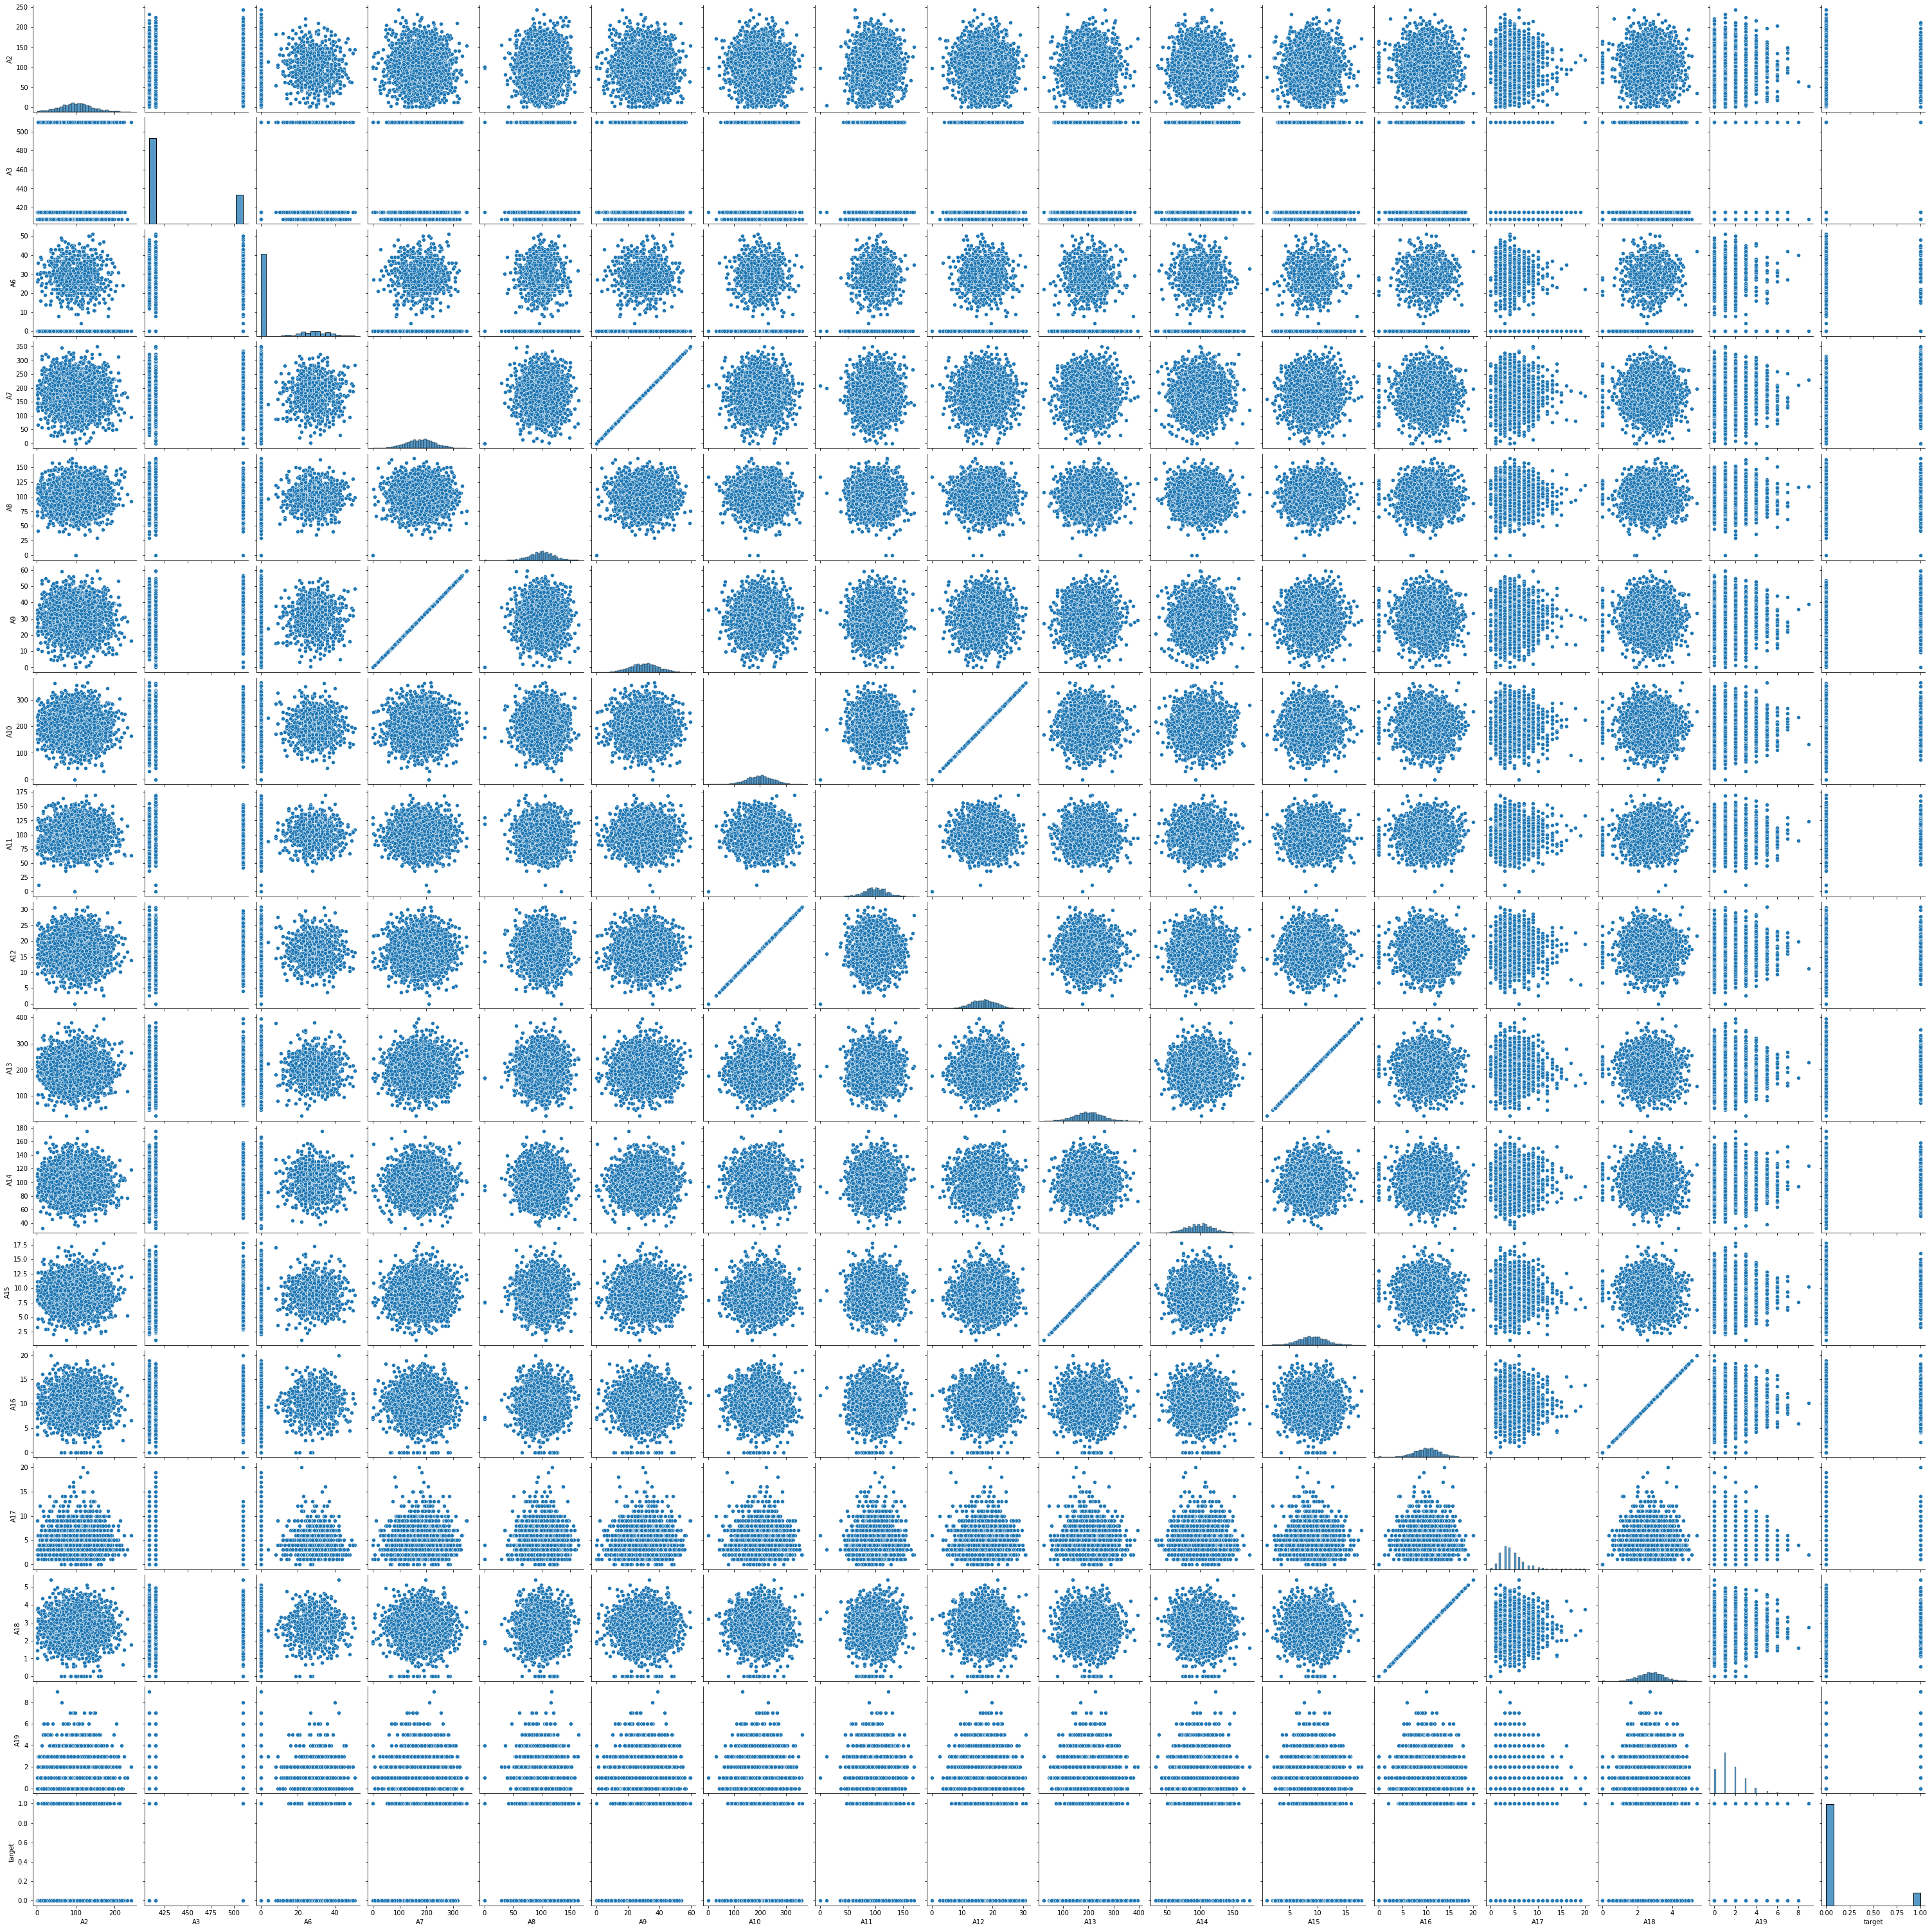

In [ ]:
sns.pairplot(data=df)

# Base Model

In [ ]:
y=df['target']
X=df.drop(columns=['target', 'A1', 'A4', 'A5'])
dummy = pd.get_dummies(df[['A4', 'A5']], drop_first=True)
X = pd.concat([X, dummy], axis=1)

In [ ]:
# set the random seed for reproducibility 
rng = np.random.RandomState(0)

In [ ]:
def score_stats(score):
  # return score, score.mean(), score.std()
    return ("scores: {} \n mean: {} \n std: {}").format(score, score.mean(), score.std())

In [ ]:
from pandas.io.formats.printing import pprint_thing
# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

def evaluateRF(pipe):
  y=df['target']
  X=df.drop(columns=['target', 'A1', 'A4', 'A5'])
  dummy = pd.get_dummies(df[['A4', 'A5']], drop_first=True)
  X = pd.concat([X, dummy], axis=1)

  # X=df.drop(columns=['target', 'A1', 'A4', 'A5'])
  # print(score_stats(cross_val_score(pipe, X, y))
  
  scorer = make_scorer(f1_score, average='macro')
  # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
  # use stratified kfold so it has the same balance of class labels
  cv = StratifiedKFold(random_state=rng, shuffle=True)

  # let's use the cross_validate function instead so we can get train scores too to detect overfitting 
  score = cross_validate(pipe, X, y, return_train_score=True, cv=cv, scoring=scorer)
  test = score['test_score']
  train = score['train_score']
  print("Train Scores")
  print("Mean: {} \t STD: {}".format(round(train.mean(), 4), round(train.std(), 4)))
  print('\n')
  print("Test Scores:")
  print("Mean: {} \t STD: {}".format(round(test.mean(), 4), round(test.std(), 4)))
  
  
  


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


In [ ]:
evaluateRF(make_pipeline(StandardScaler(), RandomForestClassifier(random_state=rng)))

Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.8711 	 STD: 0.0228


In [ ]:
evaluateRF(make_pipeline(RandomForestClassifier(random_state=rng))) # best base model

Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.8829 	 STD: 0.0137


In [ ]:
from sklearn.tree import DecisionTreeClassifier 

evaluateRF(make_pipeline(DecisionTreeClassifier(random_state=rng)))

Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.8117 	 STD: 0.0348


Seems that the model could be overfitting. Hard to say since we are achieving good performances in training and testing, but I'll play around with some ideas to reduce overfitting to see if that gets a better test performance

# Leave on out Cross Validation 


In [ ]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

y=df['target']
X=df.drop(columns=['target', 'A1', 'A4', 'A5'])
dummy = pd.get_dummies(df[['A4', 'A5']], drop_first=True)
X = pd.concat([X, dummy], axis=1)

pipe = make_pipeline(RandomForestClassifier(random_state=rng))

score = cross_validate(pipe, X, y, return_train_score=True, cv=loo)
test = score['test_score']
train = score['train_score']
print("Train Scores")
print("Mean: {} \t STD: {}".format(round(train.mean(), 4), round(train.std(), 4)))
print('\n')
print("Test Scores:")
print("Mean: {} \t STD: {}".format(round(test.mean(), 4), round(test.std(), 4)))

# huge time to train and not that much of a benefit, so not really worth it

KeyboardInterrupt: ignored

# PCA
Got some good performance out of PCA, but nothing that is competitive with the above models

In [ ]:
from sklearn.decomposition import PCA  

evaluateRF(make_pipeline(StandardScaler(), PCA(n_components='mle'), RandomForestClassifier(random_state=rng)))


Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.6796 	 STD: 0.0345


In [ ]:
from sklearn.decomposition import PCA  

evaluateRF(make_pipeline(StandardScaler(), PCA(n_components='mle'), RandomForestClassifier(random_state=rng, n_estimators=500)))


Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.6901 	 STD: 0.0281


In [ ]:

evaluateRF(make_pipeline(PCA(n_components='mle'), RandomForestClassifier(random_state=rng, n_estimators=500)))

Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.8367 	 STD: 0.0327


In [ ]:

evaluateRF(make_pipeline(PCA(n_components='mle'), RandomForestClassifier(random_state=rng, n_estimators=200)))

Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.8291 	 STD: 0.0292


In [ ]:
from sklearn.decomposition import PCA  

evaluateRF(make_pipeline(StandardScaler(), PCA(n_components=10), RandomForestClassifier(random_state=rng)))


Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.7186 	 STD: 0.04


# Feature Engineering

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
evaluateRF(make_pipeline(PolynomialFeatures(2), 
                         PCA(n_components='mle'),
                         RandomForestClassifier(random_state=rng, n_estimators=200)))

Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.76 	 STD: 0.0219


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
evaluateRF(make_pipeline(PolynomialFeatures(2), 
                         RandomForestClassifier(random_state=rng, n_estimators=200)))


## also a really good score and pretty simple

Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.8985 	 STD: 0.0197


In [ ]:
from sklearn.pipeline import make_union

evaluateRF(make_pipeline(
    make_union(PolynomialFeatures(2), FunctionTransformer(np.log1p)),
                         RandomForestClassifier(random_state=rng, n_estimators=200)))



Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.8977 	 STD: 0.0244


In [ ]:
from sklearn.pipeline import make_union

evaluateRF(make_pipeline(
    make_union(PolynomialFeatures(2), FunctionTransformer(np.log1p), FunctionTransformer(np.sqrt)),
                         RandomForestClassifier(random_state=rng, n_estimators=200)))

Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.9025 	 STD: 0.0269


In [ ]:
from sklearn.pipeline import make_union

evaluateRF(make_pipeline(PolynomialFeatures(2),
    make_union(FunctionTransformer(np.sqrt), FunctionTransformer(np.log1p)),
                         RandomForestClassifier(random_state=rng, n_estimators=200)))



Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.9018 	 STD: 0.0098


In [ ]:
from sklearn.pipeline import make_union

evaluateRF(make_pipeline(PolynomialFeatures(2),
    make_union(FunctionTransformer(np.sqrt), FunctionTransformer(np.log1p)), PCA(n_components='mle'),
                         RandomForestClassifier(random_state=rng, n_estimators=200)))

Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.7008 	 STD: 0.0096


In [ ]:
pipe = make_pipeline(
    make_union(FunctionTransformer(np.sqrt), FunctionTransformer(np.log1p), PolynomialFeatures(2)),  
    RandomForestClassifier(random_state=rng, n_estimators=200))

evaluateRF(pipe)
## Best score

Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.9048 	 STD: 0.019


In [ ]:
pipe = make_pipeline(
    make_union(FunctionTransformer(np.sqrt), FunctionTransformer(np.log1p), PolynomialFeatures(2)), 
    StandardScaler(),  
    RandomForestClassifier(random_state=rng, n_estimators=200))

evaluateRF(pipe)

Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.8982 	 STD: 0.0134


In [ ]:

evaluateRF(make_pipeline(
   FunctionTransformer(np.sqrt),
                         RandomForestClassifier(random_state=rng, n_estimators=200)))

Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.8746 	 STD: 0.0258


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
evaluateRF(make_pipeline(PolynomialFeatures(2), StandardScaler(),
                         RandomForestClassifier(random_state=rng, n_estimators=200)))

Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.9009 	 STD: 0.0159


In [ ]:
from sklearn.preprocessing import FunctionTransformer

evaluateRF(make_pipeline(PolynomialFeatures(2), 
                         FunctionTransformer(np.log1p),
                         RandomForestClassifier(random_state=rng, n_estimators=200)))

Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.8939 	 STD: 0.0111


In [ ]:

evaluateRF(make_pipeline(PolynomialFeatures(2), 
                         FunctionTransformer(np.log1p),
                         PCA(n_components='mle'),
                         RandomForestClassifier(random_state=rng, n_estimators=200)))

Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.6931 	 STD: 0.0394


# Imbalanced Learn
Because we want the best f1 macro average, let's try and average out the class balance to see if that can produce better results 

In [ ]:
%pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Over sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)


In [ ]:
pipe

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('functiontransformer-1',
                                                 FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                ('functiontransformer-2',
                                                 FunctionTransformer(func=<ufunc 'log1p'>)),
                                                ('polynomialfeatures',
                                                 PolynomialFeatures())])),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=200,
                                        random_state=RandomState(MT19937) at 0x7FFB086BF270))])

In [ ]:

pipe = make_pipeline(
    make_union(FunctionTransformer(np.sqrt), FunctionTransformer(np.log1p), PolynomialFeatures(2)), 
    StandardScaler(),  
    RandomForestClassifier(random_state=rng, n_estimators=200))

scorer = make_scorer(f1_score, average='macro')
cv = StratifiedKFold(random_state=rng, shuffle=True)
score = cross_validate(pipe, X_resampled, y_resampled, return_train_score=True, cv=cv, scoring=scorer)
test = score['test_score']
train = score['train_score']
print("Train Scores")
print("Mean: {} \t STD: {}".format(round(train.mean(), 4), round(train.std(), 4)))
print('\n')
print("Test Scores:")
print("Mean: {} \t STD: {}".format(round(test.mean(), 4), round(test.std(), 4)))

# very good but I'm skeptical because of using stratified kfold with oversampling

Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.9248 	 STD: 0.0172


In [ ]:

pipe = make_pipeline(
    make_union(FunctionTransformer(np.sqrt), FunctionTransformer(np.log1p), PolynomialFeatures(2)), 
    StandardScaler(),  
    RandomForestClassifier(random_state=rng, n_estimators=200))

scorer = make_scorer(f1_score, average='macro')
# cv = StratifiedKFold(random_state=rng, shuffle=True)
score = cross_validate(pipe, X_resampled, y_resampled, return_train_score=True, cv=5, scoring=scorer)
test = score['test_score']
train = score['train_score']
print("Train Scores")
print("Mean: {} \t STD: {}".format(round(train.mean(), 4), round(train.std(), 4)))
print('\n')
print("Test Scores:")
print("Mean: {} \t STD: {}".format(round(test.mean(), 4), round(test.std(), 4)))

# best model (by average score), but there is a high std. I'll use this one

Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.9217 	 STD: 0.0194


In [ ]:
pipe  = make_pipeline(PolynomialFeatures(2), 
                         RandomForestClassifier(random_state=rng, n_estimators=200))

scorer = make_scorer(f1_score, average='macro')
cv = StratifiedKFold(random_state=rng, shuffle=True)
score = cross_validate(pipe, X_resampled, y_resampled, return_train_score=True, cv=5, scoring=scorer)
test = score['test_score']
train = score['train_score']
print("Train Scores")
print("Mean: {} \t STD: {}".format(round(train.mean(), 4), round(train.std(), 4)))
print('\n')
print("Test Scores:")
print("Mean: {} \t STD: {}".format(round(test.mean(), 4), round(test.std(), 4)))

Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.92 	 STD: 0.0231


## Under sampling

In [ ]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X, y)

In [ ]:
scorer = make_scorer(f1_score, average='macro')
cv = StratifiedKFold(random_state=rng, shuffle=True)
score = cross_validate(pipe, X_resampled, y_resampled, return_train_score=True, cv=cv, scoring=scorer)
test = score['test_score']
train = score['train_score']
print("Train Scores")
print("Mean: {} \t STD: {}".format(round(train.mean(), 4), round(train.std(), 4)))
print('\n')
print("Test Scores:")
print("Mean: {} \t STD: {}".format(round(test.mean(), 4), round(test.std(), 4)))


# almost exactly the same as oversampling, but because I want the model to be trained on more data, I'll use oversampling

Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.9249 	 STD: 0.0287


# Hyperparamater Tuning: Random and Grid Search

In [ ]:
y=df['target']
X=df.drop(columns=['target', 'A1', 'A4', 'A5'])
dummy = pd.get_dummies(df[['A4', 'A5']], drop_first=True)
X = pd.concat([X, dummy], axis=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rgrid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = rgrid, n_iter = 100, cv = 3, verbose=2, random_state=rng, n_jobs = -1)
# Fit the random search model

rf_random.fit(X, y)
res = rf_random.cv_results_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_random.best_score_  # surprisingly, very bad, and not even close to the above performances. 

0.6489390683909995

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('rf', RandomForestClassifier())])
param_grid = {
    'rf__max_depth': np.arange(20, 200, 10),          # how deep the trees go
    'rf__max_features': np.arange(0.1, 1.1, 0.1),          # how many features to put in the tree
    'rf__min_samples_leaf': np.arange(0.1, 1.1, 0.1), # minimum number of samples required to be at a leaf node
    'rf__min_samples_split': np.arange(0.1, 1.1, 0.1),  # The minimum number of samples required to split an internal node:
    'rf__n_estimators': np.arange(25, 400, 25)
}

# grid_iter = iter(param_grid)

cv = StratifiedKFold(random_state=rng, shuffle=True, n_splits=3)


In [ ]:
for i in param_grid.keys():
  # this_iter = next(grid_iter)
  test_dict = {i: param_grid[i]}
  print('##########################################')
  print(test_dict)
  print('##########################################')

  search = GridSearchCV(pipe, test_dict, return_train_score=True, cv=cv)

  search.fit(X, y)
  res = search.cv_results_
  best_param = list(search.best_params_.values())[0]
  loc_best_param = list(list(test_dict.values())[0]).index(best_param)

  # print averages from cv's for all runs from test and trani
  print([round(item, 4) for item in res['mean_test_score']])
  print([round(item, 4) for item in res['mean_train_score']])


  print('################ Best Param ################')
  print('Best Param: {}'.format(best_param))

  # print the mean and std of test and train scores for the best param
  print("Test")
  print("Mean {} STD {}".format((round(res['mean_test_score'][loc_best_param], 3)), round(res['std_test_score'][loc_best_param], 3)))
  print("Train")
  print("Mean {} STD {}".format((round(res['mean_train_score'][loc_best_param], 3)), round(res['std_train_score'][loc_best_param], 3)))

  print('\n')
  

  # unfortunately, I accidentaly ran all cells in the notebook and wrote over this one and it 
  # took a while to run so I didn't want to wait to do it again
  # and compiled the best ranges of parameters (written below) for use in a final grid search 

##########################################
{'rf__max_depth': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
       150, 160, 170, 180, 190])}
##########################################


KeyboardInterrupt: ignored

- rf_max_features: best between 0.2 and 0.3
- rf_max_samples: best between 0.8 and 0.9
- rf_min_samples_split: between 2 and 8 


- rf_min_samples_leaf: best at 1
- rf__n_estimators: best at 225
- max depth: no real influence

## Using best param range, with best pipe and oversampling

In [ ]:
revised_param_grid = {
    'randomforestclassifier__max_features': np.arange(0.15, 0.30, 0.05),         
    'randomforestclassifier__min_samples_split': np.arange(2, 8, 2),  
    'randomforestclassifier__max_samples': np.linspace(0.8, 0.9, 3)
}

pipe = make_pipeline(
    make_union(FunctionTransformer(np.sqrt), FunctionTransformer(np.log1p), PolynomialFeatures(2)), 
    StandardScaler(),  
    RandomForestClassifier(n_estimators=225,
                  min_samples_leaf=1,
                  bootstrap=True, n_jobs=-1, verbose=0))

search = GridSearchCV(pipe, revised_param_grid, return_train_score=True, cv=cv, scoring=scorer, verbose=3)

X_resampled, y_resampled = ros.fit_resample(X, y)

search.fit(X_resampled, y_resampled)
res = search.cv_results_

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END randomforestclassifier__max_features=0.15, randomforestclassifier__max_samples=0.8, randomforestclassifier__min_samples_split=2;, score=(train=1.000, test=0.990) total time=  12.1s
[CV 2/3] END randomforestclassifier__max_features=0.15, randomforestclassifier__max_samples=0.8, randomforestclassifier__min_samples_split=2;, score=(train=1.000, test=0.991) total time=   7.1s
[CV 3/3] END randomforestclassifier__max_features=0.15, randomforestclassifier__max_samples=0.8, randomforestclassifier__min_samples_split=2;, score=(train=1.000, test=0.992) total time=   6.8s
[CV 1/3] END randomforestclassifier__max_features=0.15, randomforestclassifier__max_samples=0.8, randomforestclassifier__min_samples_split=4;, score=(train=1.000, test=0.987) total time=   6.9s
[CV 2/3] END randomforestclassifier__max_features=0.15, randomforestclassifier__max_samples=0.8, randomforestclassifier__min_samples_split=4;, score=(train=1.000, 

In [ ]:
res.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_randomforestclassifier__max_features', 'param_randomforestclassifier__max_samples', 'param_randomforestclassifier__min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [ ]:
search.best_params_

{'randomforestclassifier__max_features': 0.15,
 'randomforestclassifier__max_samples': 0.9,
 'randomforestclassifier__min_samples_split': 2}

# Creating the best model and outputs

In [ ]:
# verify we are getting good results
best_pipe = make_pipeline(
    make_union(FunctionTransformer(np.sqrt), FunctionTransformer(np.log1p), PolynomialFeatures(2)), 
    StandardScaler(),  
    RandomForestClassifier(n_estimators=225,
                  max_features=0.15, min_samples_split=2,
                  min_samples_leaf=1, max_samples=0.9,
                  bootstrap=True, n_jobs=-1, verbose=0))


scorer = make_scorer(f1_score, average='macro')

# let's use the cross_validate function instead so we can get train scores too to detect overfitting 
score = cross_validate(best_pipe, X_resampled, y_resampled, return_train_score=True, cv=5, scoring=scorer)
test = score['test_score']
train = score['train_score']
print("Train Scores")
print("Mean: {} \t STD: {}".format(round(train.mean(), 4), round(train.std(), 4)))
print('\n')
print("Test Scores:")
print("Mean: {} \t STD: {}".format(round(test.mean(), 4), round(test.std(), 4)))


# wow, was not expecting that much of an improvement from hyper param tuning 


Train Scores
Mean: 1.0 	 STD: 0.0


Test Scores:
Mean: 0.9913 	 STD: 0.0036


## output

In [ ]:
x_comp = pd.read_csv("DTRF-competition-features.csv", header=None)

In [ ]:
x_comp

0    1    2    3    4   5      6    7      8      9    10     11     12  \
0    NY   40  510   No   No   0  115.7  105  19.67  127.8  113  10.86  107.5   
1    OR  142  510   No  Yes  22  224.4  114  38.15  146.0  106  12.41  241.4   
2    SD   78  408   No   No   0  163.6   88  27.81  283.4   93  24.09  262.1   
3    MI  225  415   No   No   0  165.4  106  28.12  273.7  109  23.26  210.0   
4    DE  113  415   No   No   0  239.7   47  40.75  282.9  110  24.05  238.4   
..   ..  ...  ...  ...  ...  ..    ...  ...    ...    ...  ...    ...    ...   
395  MI  134  415   No  Yes  41  162.0   82  27.54  324.7   77  27.60  160.1   
396  NJ  131  415   No   No   0  211.8  115  36.01  260.5  102  22.14  144.2   
397  UT  133  408   No  Yes  44  174.0   80  29.58  209.4  113  17.80  224.1   
398  AR  118  415   No   No   0  267.8  145  45.53  316.4  121  26.89  208.6   
399  CO  121  408  Yes   No   0  167.7   94  28.51   93.7  121   7.96  241.3   

      13     14    15  16    17  18  
0     91   4.84   9.3   6  2.51   1  
1     98  10.86   8.8   2  2.38   1  
2    108  11.79   8.6   9  2.32   0  
3     93   9.45   8.7   3  2.35   0  
4     88  10.73   8.7   3  2.35   2  
..   ...    ...   ...  ..   ...  ..  
395  112   7.20  11.9   5  3.21   0  
396   96   6.49  10.8   7  2.92   0  
397   87  10.08  14.1   7  3.81   2  
398   91   9.39  14.4  11  3.89   5  
399  115  10.86  13.4   1  3.62   3  

[400 rows x 19 columns]

In [ ]:
x_comp_temp = x_comp.drop(columns=[0, 3,4])
dummy = pd.get_dummies(x_comp[[3,4]], drop_first=True)

x_comp = pd.concat([x_comp_temp, dummy], axis=1)



In [190]:


best_pipe.fit(X_resampled, y_resampled)



results = best_pipe.predict(x_comp)
results = results.reshape(-1,)

results_df = pd.DataFrame(results, columns=[0])

results_df.to_csv('DTRF-ypred.csv',index=False, header=None)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
results.shape

(400,)

In [ ]:
# verify I did it right: 
sample_target = pd.read_csv('DTRF-sample-target.csv', header=None)
sample_features = pd.read_csv('DTRF-sample-features.csv', header=None)

sample_temp = sample_features.drop(columns=[0, 3,4])
dummy = pd.get_dummies(sample_features[[3,4]], drop_first=True)

sample_features = pd.concat([sample_temp, dummy], axis=1)


test_results = best_pipe.predict(sample_features)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
test_results = test_results.reshape(-1,)
test_df = pd.DataFrame(test_results, columns=[0])
# test_results.shape
test_df


0
0   0
1   0
2   0
3   0
4   0
.. ..
95  0
96  0
97  0
98  0
99  0

[100 rows x 1 columns]

In [ ]:
test_df.to_csv('test-ypred.csv', index=False, header=None)

In [ ]:
sample_target

0
0   0
1   0
2   0
3   0
4   0
.. ..
95  0
96  0
97  0
98  0
99  0

[100 rows x 1 columns]

In [ ]:
test_in = pd.read_csv('test-ypred.csv', header=None)
test_in

0
0   0
1   0
2   0
3   0
4   0
.. ..
95  0
96  0
97  0
98  0
99  0

[100 rows x 1 columns]